# Models used:
- [blip-image-captioning-base ](https://huggingface.co/Salesforce/blip-image-captioning-base) For Image captioning 
-  [image-text matching]()

In [1]:
from PIL import Image
import requests

from transformers import BlipProcessor, BlipForConditionalGeneration

model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")

In [17]:
# List of images urls
urls = [
    'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQb7Vr1pWBDZ3W22B4stmJDciCuvvUS0KdvZQ&s', #1
    'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS64Myrx7ARPyWQTFkgSK5kUsfVYj-f0Mzirg&s', #2
    'https://lumiere-a.akamaihd.net/v1/images/image_57ecff16.jpeg?region=0,0,640,480', #3
    'https://i.pinimg.com/736x/0c/5d/f8/0c5df8f867201f8c1bd40951265cc0b2.jpg', #4
    # 'https://www.autocar.co.uk/sites/autocar.co.uk/files/styles/gallery_slide/public/images/car-reviews/first-drives/legacy/rolls_royce_phantom_top_10.jpg?itok=XjL9f1tx', #5
    # 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSzNMFUgrECfGrWrt5_lio1aF5xnqrsaLxZnQ&s', #6
    # 'https://omrania.com/wp-content/uploads/Omrania-Kingdome-Center_Saudi-Arabia-KSA-Abdullah_Aleisa.jpg', #7
    # 'https://cdn.pixabay.com/photo/2023/12/08/08/58/sea-8437245_640.jpg', #8
    # 'https://i.ytimg.com/vi/dqhVmYn4HF0/maxresdefault.jpg', #9
    # 'https://upload.wikimedia.org/wikipedia/commons/e/e7/Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg' # 10
    # 'https://i.insider.com/5a271fbc7101ad7b9647b9d8?width=1200&format=jpeg', # 11,
    # 'https://media.cntraveler.com/photos/5a009c8e25be133d871c008e/16:9/w_1280,c_limit/Mountain-Travel_GettyImages-503689316.jpg', # 12
    # 'https://ichef.bbci.co.uk/news/1024/branded_news/10F1C/production/_128740496_bbcm_saudi_arabia_country_profile_map_230223.jpg', # 13
    # 'https://www.agoda.com/wp-content/uploads/2019/05/Things-to-do-in-Jeddah-Saudi-Arabia-Al-Balad.jpg', # 14
    # 'https://platinumlist.net/guide/wp-content/uploads/2023/12/jeddah_break_free_landing_page_winter_campaign_1920x1080_6.jpg', # 15
    # 'https://pbs.twimg.com/media/FAdz24_WEAkYNzP.jpg', # 16
]

Looping through the images and generate captions using Blip model

In [18]:
images_obj = [Image.open(requests.get(url, stream=True).raw) for url in urls]

In [19]:
inputs = processor(images=images_obj, return_tensors="pt")
outputs = model.generate(**inputs, max_length=15)

In [20]:
outputs[0]

tensor([30522,  1996,  3494,  1997,  2503,  2041,   102,     0,     0,     0,
            0,     0,     0,     0,     0])

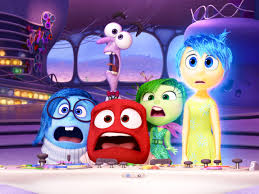

KeyboardInterrupt: 

In [3]:
# Display the images and generate captions




for image_url in urls:
    # image = Image.open(requests.get(image_url, stream=True).raw)
    # display(image)


    caption = processor.decode(outputs[0], skip_special_tokens=True)

    print("Generated caption:", caption)
    print()


    
    

# image = Image.open(requests.get(image_urls[14], stream=True).raw)


# inputs = processor(image, return_tensors="pt")

# outputs = model.generate(**inputs, max_length=15)
# caption = processor.decode(outputs[0], skip_special_tokens=True)

# print("Generated caption:", caption)